In [ ]:
pip install numpy

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN,Dense
from tensorflow.keras.preprocessing import sequence

2025-06-16 08:45:25.920562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750063525.944049     134 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750063525.951152     134 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
max_feat=10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_feat)

In [ ]:
x_train

In [4]:
max_len=500
x_train=sequence.pad_sequences(x_train,maxlen=max_len)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)

In [11]:
model=Sequential()
model.add(Embedding(max_feat,120,input_length=max_len))
model.add(SimpleRNN(120,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [14]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[earlystopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5672 - loss: 249.4848 - val_accuracy: 0.6916 - val_loss: 0.5788
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6088 - loss: 186.2921 - val_accuracy: 0.6576 - val_loss: 0.6036
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7208 - loss: 0.5399 - val_accuracy: 0.7096 - val_loss: 0.5507
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7965 - loss: 0.4573 - val_accuracy: 0.7312 - val_loss: 0.5255
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8330 - loss: 0.3996 - val_accuracy: 0.7968 - val_loss: 0.4406
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8862 - loss: 0.2922 - val_accuracy: 0.8206 - val_loss: 0.4226
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9266 - loss: 0.1938 - val_accuracy: 0.8232 - val_loss: 0.4197
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9478 - loss: 0.154

In [16]:
model.save('model_review_rnn.h5')

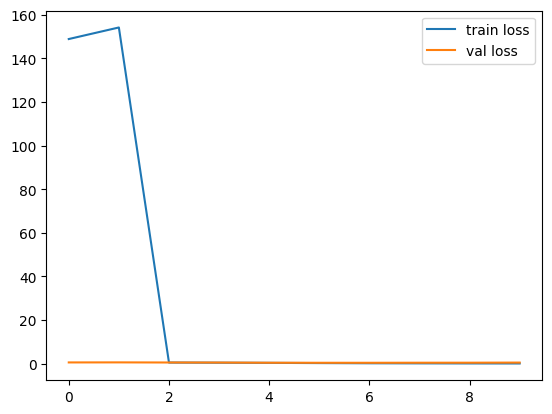

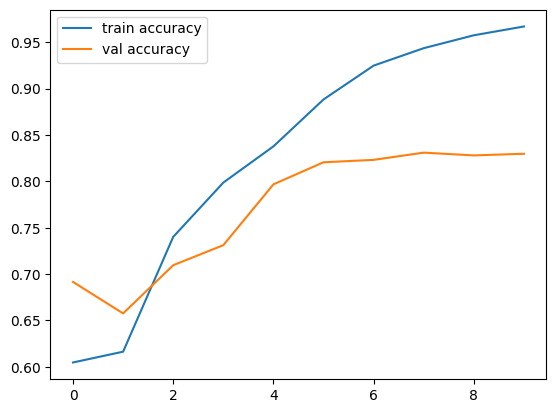

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
